In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

# DATA

https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

In [2]:
bmi_data=pd.read_csv(r"C:\Users\Bhavya Yadav\Desktop\ai ml dataset\DataSets-master\Bmi_male_female.csv")

In [3]:
bmi_data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
bmi_data.shape

(500, 4)

In [5]:
x_GHW=bmi_data.iloc[:,0:3]
y_Target=bmi_data.iloc[:,3]

In [6]:
x_GHW

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [7]:
y_Target

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [8]:
print("smaple in x_GHW is {} and y_Target is {}".format(len(x_GHW),len(y_Target)))

smaple in x_GHW is 500 and y_Target is 500


In [9]:
x_GHW.dtypes

Gender    object
Height     int64
Weight     int64
dtype: object

In [10]:
print("type of x_GHW is {} and y_Target is {}".format(type(x_GHW),type(y_Target)))

type of x_GHW is <class 'pandas.core.frame.DataFrame'> and y_Target is <class 'pandas.core.series.Series'>


In [11]:
x_GHW

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [12]:
#now encode male with 0 and female wirth 1

In [13]:
x_GHW["Gender"].map({"Male":0,"Female":1})

0      0
1      0
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    0
Name: Gender, Length: 500, dtype: int64

In [14]:
x_GHW["Gender"]=x_GHW["Gender"].map({"Male":0,"Female":1})

In [15]:
x_GHW

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [16]:
#coverting in array (X_GHW and y_Target)

In [17]:
XA_GHW=x_GHW.values
YA_Target=y_Target.values

In [18]:
print("type of xAGHW is {} and yA_Target is {}".format(type(XA_GHW),type(YA_Target)))

type of xAGHW is <class 'numpy.ndarray'> and yA_Target is <class 'numpy.ndarray'>


In [19]:
#splittting training and test
n=int(len(XA_GHW)*.70)
n

350

In [20]:
x_train=XA_GHW[:n]
x_test=XA_GHW[n:]
y_train=YA_Target[:n]
y_test=YA_Target[n:]

In [21]:
#x_train.shape

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
trainer=KNeighborsClassifier(n_neighbors=5)

In [28]:
learner=trainer.fit(x_train,y_train)

In [29]:
index_label=pd.Series(["Extremly Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

In [30]:
#index_Label

[3]
you are 3    Overweight
dtype: object 


In [32]:
pr

array([[0. , 0.6, 0.4, 0. , 0. , 0. ]])

In [33]:
#learner.classes

In [34]:
YPre=learner.predict(x_test)
YAct =y_test

In [35]:
acc_table=pd.DataFrame({"Ya":list(YAct),"Yp":list(YPre)})

In [36]:
acc_table.head(5)

,Ya,Yp
0,2,3
1,2,2
2,2,2
3,5,5
4,0,0


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
knn_acc_score=accuracy_score(YAct,YPre)*100

In [39]:
knn_acc_score

91.33333333333333

In [40]:
k=int(np.sqrt(len(x_train)))+1

In [41]:
k_range=list(range(1,k))

In [42]:
k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [43]:
acc_list=[]
for i in range(1,k):
    knn_trainer=KNeighborsClassifier(n_neighbors=i)
    knn_learner=knn_trainer.fit(x_train,y_train)
    YKnn_prediction=knn_learner.predict(x_test)
    knn_acc=accuracy_score(YKnn_prediction,YAct)
    acc_list.append(knn_acc)
    print("Accuracy of knn is {} at k={}".format(knn_acc,i))
                           
    

Accuracy of knn is 0.8933333333333333 at k=1
Accuracy of knn is 0.9066666666666666 at k=2
Accuracy of knn is 0.8933333333333333 at k=3
Accuracy of knn is 0.9333333333333333 at k=4
Accuracy of knn is 0.9133333333333333 at k=5
Accuracy of knn is 0.9133333333333333 at k=6
Accuracy of knn is 0.9133333333333333 at k=7
Accuracy of knn is 0.9066666666666666 at k=8
Accuracy of knn is 0.92 at k=9
Accuracy of knn is 0.9066666666666666 at k=10
Accuracy of knn is 0.9 at k=11
Accuracy of knn is 0.92 at k=12
Accuracy of knn is 0.9133333333333333 at k=13
Accuracy of knn is 0.92 at k=14
Accuracy of knn is 0.88 at k=15
Accuracy of knn is 0.8933333333333333 at k=16
Accuracy of knn is 0.8933333333333333 at k=17
Accuracy of knn is 0.9066666666666666 at k=18


In [63]:
acc_list_array=np.array(acc_list)
acc_list_array.argmax()

3

In [64]:
print("Max accuracy {} is at k={}".format(acc_list_array[acc_list_array.argmax()],acc_list_array.argmax()))

Max accuracy 0.9333333333333333 is at k=3


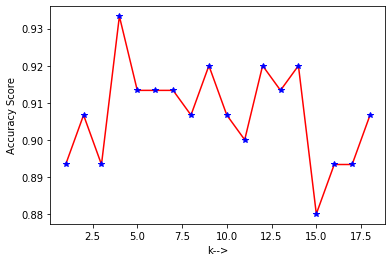

In [65]:
plt.plot(k_range,acc_list,'r')
plt.plot(k_range,acc_list,'b*')
plt.xlabel("k-->")
plt.ylabel("Accuracy Score")
plt.show()

In [66]:
import pickle

In [67]:
knn_model=pickle.dumps(learner)

In [68]:
load_knn=pickle.loads(knn_model)

In [69]:
load_knn.predict([[0,165,78]])

array([3], dtype=int64)

In [70]:
ModelName="pickleModel"

In [71]:
pickle.dump(learner,open(ModelName,'wb'))

In [72]:
load_file=pickle.load(open(ModelName,'rb'))

In [73]:
load_file.predict([[1,178,17]])

array([0], dtype=int64)